In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/practice/new_mixes.csv
/kaggle/input/concrete-mix1/2500 Concrete design mixes.csv


# 📊 SECTION 1 — Raw data load & visual audit (no mutation)

Shape: (2286, 20)

Columns:
 ['Type_of_course_Aggregate', 'Type_of_Fine_Aggregate_', 'Max._Size_of_Coarse_Aggregate_(mm)', 'Passing_0.6_mm_Sieve_(%)', 'Target_Mean_Strength_(N/mm2)', 'Cement_O.P.C_(Kg/m3)', 'W/C_Ratio', 'Water_Content_(Kg/m3)', 'Additive_Type_&_Dosage_(/100_kg_of_cement)', 'Total_Aggregate_(Kg/m3)', 'Fine_Aggregate_(Kg/m3)', 'Coarse_Aggregate_(Kg/m3)', 'Workability_Slump_(mm)', 'Hardened_Concrete_Desnity_(avg.)', '7_day_str', '28_day_str', 'Type_of_Coarse_Aggregate', 'Type_of_Fine_Aggregate', 'Admix_type', 'Admix_dosage']

Dtypes:
 Type_of_course_Aggregate                       object
Type_of_Fine_Aggregate_                        object
Max._Size_of_Coarse_Aggregate_(mm)             object
Passing_0.6_mm_Sieve_(%)                      float64
Target_Mean_Strength_(N/mm2)                   object
Cement_O.P.C_(Kg/m3)                          float64
W/C_Ratio                                     float64
Water_Content_(Kg/m3)                         float64
Additive_Type

,Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Max._Size_of_Coarse_Aggregate_(mm),Passing_0.6_mm_Sieve_(%),Target_Mean_Strength_(N/mm2),Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Additive_Type_&_Dosage_(/100_kg_of_cement),Total_Aggregate_(Kg/m3),Fine_Aggregate_(Kg/m3),Coarse_Aggregate_(Kg/m3),Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),7_day_str,28_day_str,Type_of_Coarse_Aggregate,Type_of_Fine_Aggregate,Admix_type,Admix_dosage
0,Crushed,Natural,40,0.0,43,365.0,0.52,225.0,0,1870.0,710.0,1160.0,160.0,2407.0,21.8,26.3,0,0,NaN,NaN
1,Crushed,Natural,40,0.0,CALcrete,365.0,0.52,225.0,0,1870.0,710.0,1160.0,160.0,2403.0,26.3,35.3,0,0,NaN,NaN
2,Crushed,Natural,20,45.6,38,350.0,0.53,185.0,type SP 801 dos 1 lit,1915.0,725.0,1190.0,120.0,2475.0,32.7,44.9,0,0,NaN,NaN
3,Natural,Natural,20,57.9,38,340.0,0.49,165.0,Sp 432 0.9 lit,1895.0,835.0,1060.0,190.0,2412.0,30.3,41.0,0,0,NaN,NaN
4,Natural,Natural,20,19.5,38,325.0,0.51,165.0,sp432 dos 1.0 lit,1910.0,840.0,1070.0,170.0,2404.0,27.0,0.0,0,0,NaN,NaN



Missing values (non-zero):


,missing_count,missing_%
Admix_dosage,1490,65.18
Admix_type,1258,55.03



Numeric summary (selected percentiles):


,count,mean,std,min,1%,5%,median,95%,99%,max
Passing_0.6_mm_Sieve_(%),2286.0,17.516553,23.355706,0.0,0.00,0.000,0.00,60.50,79.450,96.90
Cement_O.P.C_(Kg/m3),2286.0,362.187227,25.353206,0.0,308.50,330.000,365.00,400.00,400.000,450.00
W/C_Ratio,2286.0,0.488180,0.038208,0.0,0.41,0.440,0.49,0.54,0.560,0.62
Water_Content_(Kg/m3),2286.0,177.490814,15.266607,0.0,153.00,160.000,180.00,193.75,215.000,290.00
Total_Aggregate_(Kg/m3),2286.0,1872.401575,89.115570,0.0,1795.00,1825.000,1880.00,1915.00,1940.000,1980.00
Fine_Aggregate_(Kg/m3),2286.0,714.597113,70.281179,0.0,530.00,610.000,715.00,815.00,855.000,865.00
Coarse_Aggregate_(Kg/m3),2286.0,1152.025372,91.225007,0.0,719.25,1051.250,1160.00,1250.00,1315.000,1510.00
Workability_Slump_(mm),2286.0,149.917760,39.422775,0.0,70.00,90.000,150.00,205.00,220.000,230.00
Hardened_Concrete_Desnity_(avg.),2286.0,2421.245315,479.521844,0.0,2382.00,2386.000,2407.00,2459.75,2480.000,24003.00
7_day_str,2286.0,30.651006,6.174704,0.0,0.00,21.425,31.10,39.20,42.345,45.90


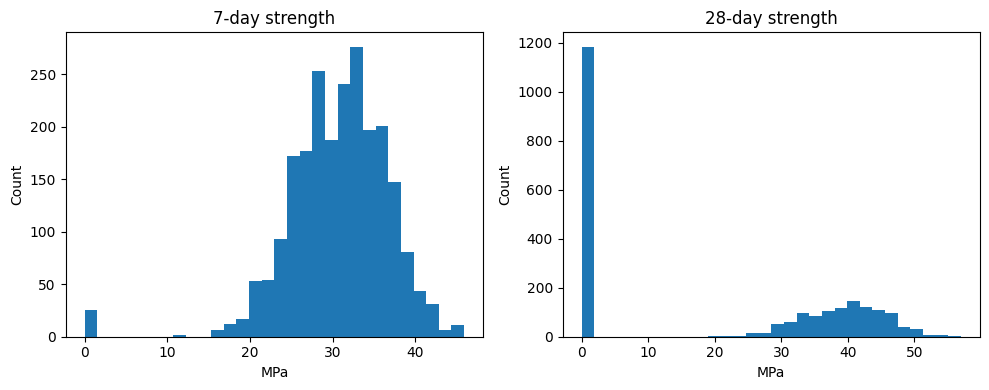

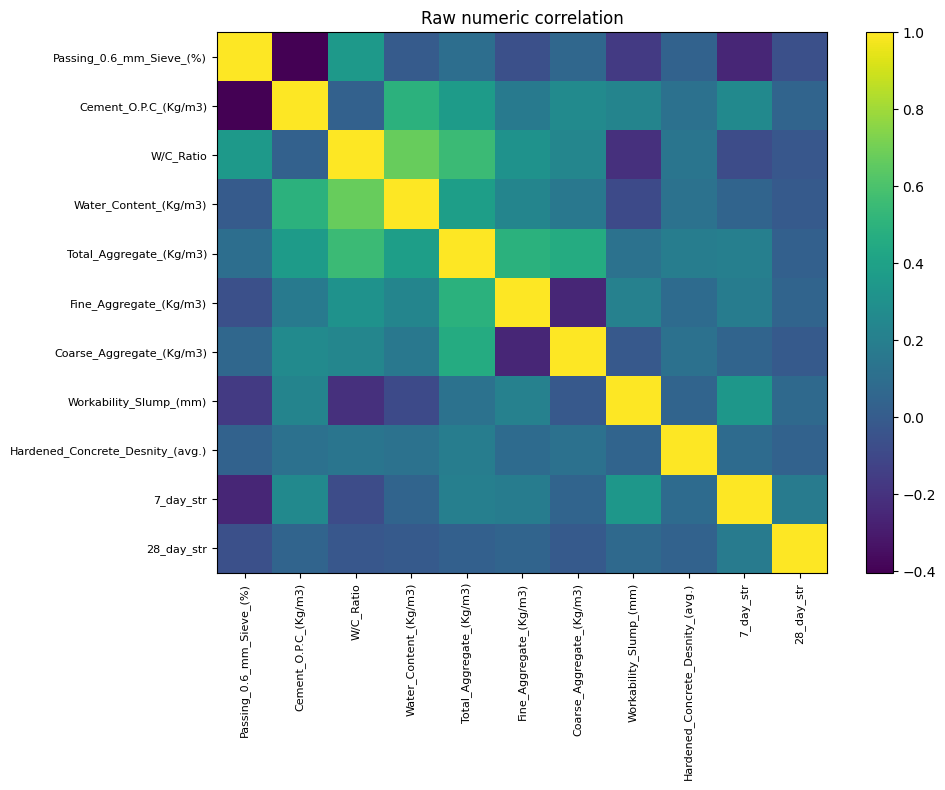

<Figure size 1400x500 with 0 Axes>

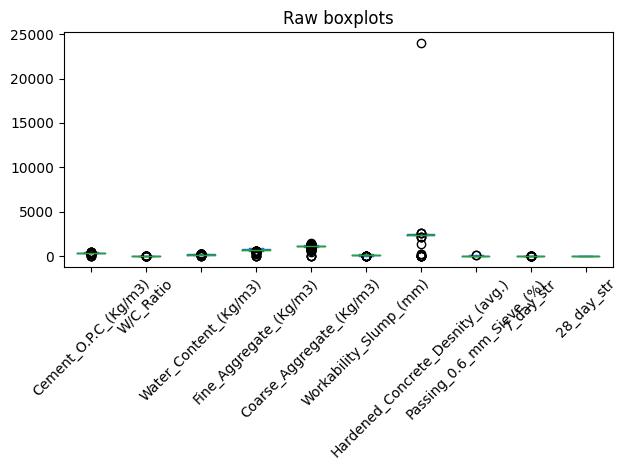

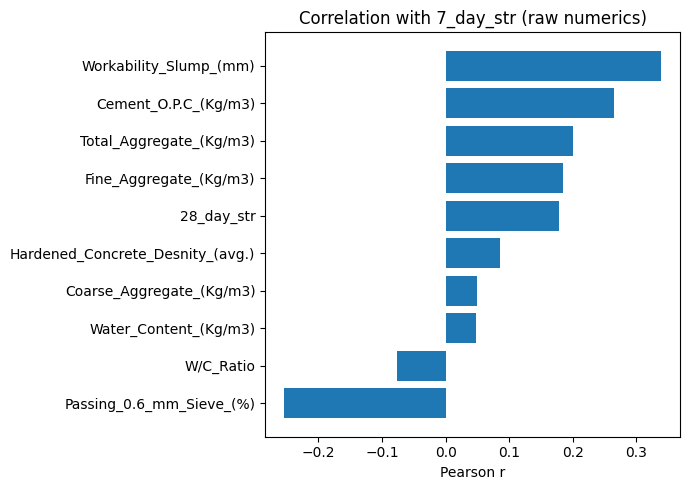


Top correlations with target:


,r
Workability_Slump_(mm),0.339
Cement_O.P.C_(Kg/m3),0.265
Total_Aggregate_(Kg/m3),0.201
Fine_Aggregate_(Kg/m3),0.185
28_day_str,0.178
Hardened_Concrete_Desnity_(avg.),0.086
Coarse_Aggregate_(Kg/m3),0.050
Water_Content_(Kg/m3),0.047
W/C_Ratio,-0.077
Passing_0.6_mm_Sieve_(%),-0.254


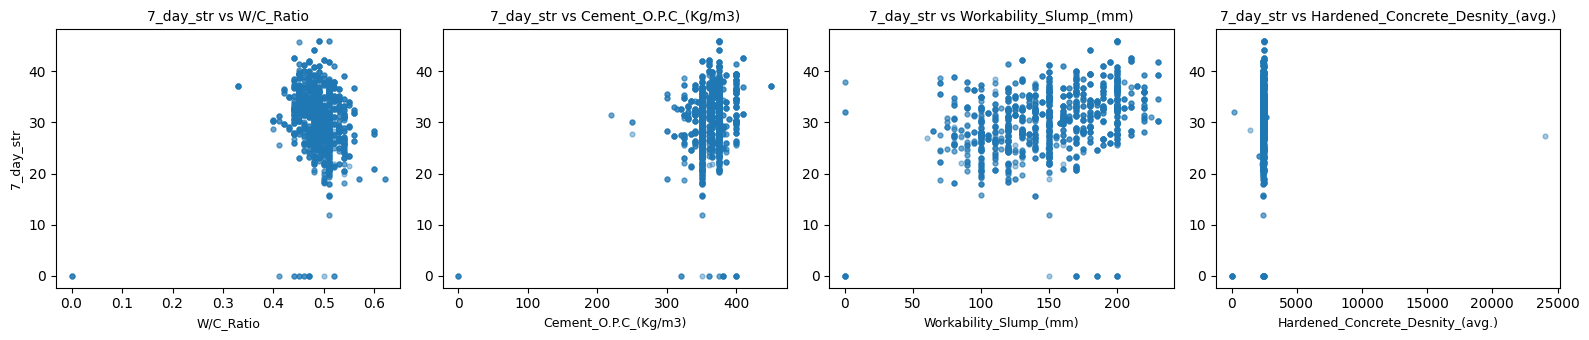

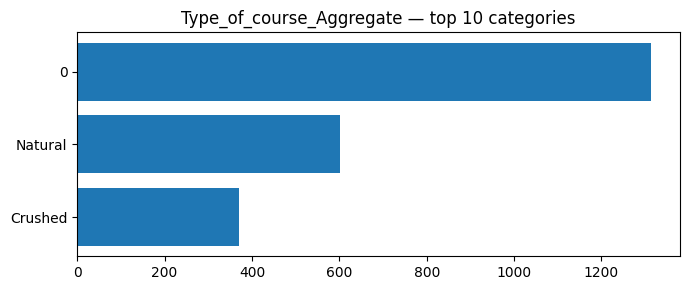

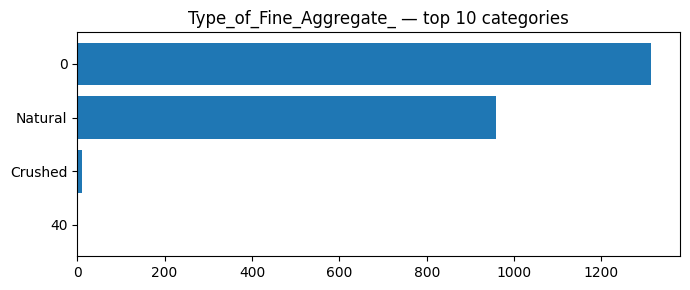

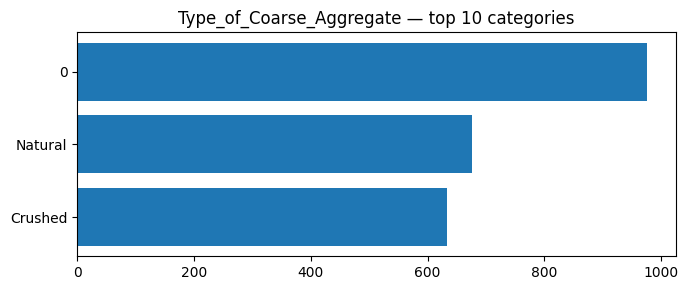

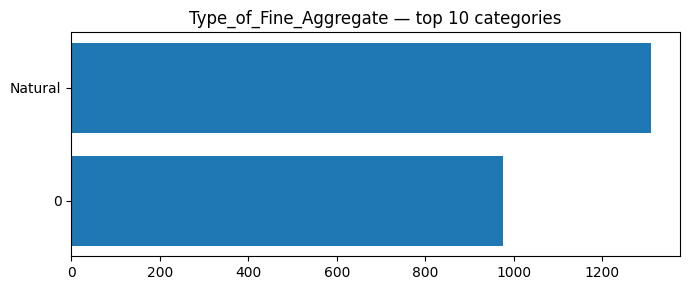

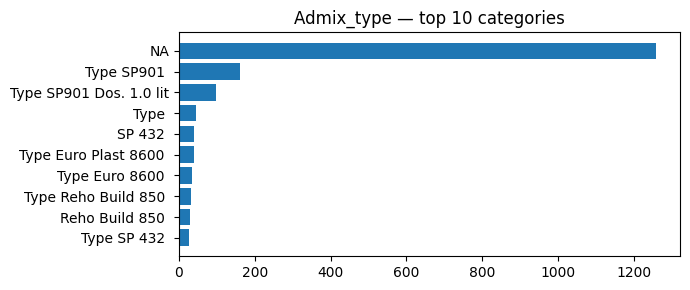

In [36]:
# SECTION 1 — Raw data audit (no mutation)
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

# ⛳️ Config (self-contained)
CSV = "/kaggle/input/concrete-mix1/2500 Concrete design mixes.csv"   # adjust if needed
TARGET = "7_day_str"                               # predict 7-day strength
USE_28_DAY_AS_FEATURE = False                      # real-world: don't use future info
RANDOM_STATE = 42

# -------------------- Load raw --------------------
df_raw = pd.read_csv(CSV)

# Drop only obvious non-features if they exist (still considered "raw view")
drop_cols = ["Unnamed: 0","Passing_0.6mm_Sieve(%)","Additive_Type_&_Dos._(/100_Kg_of_cement)"]
df_raw = df_raw.drop(columns=[c for c in drop_cols if c in df_raw.columns], errors="ignore")

print("Shape:", df_raw.shape)
print("\nColumns:\n", df_raw.columns.tolist())
print("\nDtypes:\n", df_raw.dtypes)

# Quick peek
print("\nHead:")
display(df_raw.head(5))

# -------------------- Missing summary (table) --------------------
miss_cnt = df_raw.isna().sum()
miss_pct = (miss_cnt / len(df_raw) * 100).round(2)
miss_tbl = pd.DataFrame({"missing_count": miss_cnt, "missing_%": miss_pct}).sort_values("missing_%", ascending=False)
print("\nMissing values (non-zero):")
display(miss_tbl[miss_tbl["missing_count"] > 0])

# -------------------- Numeric summary (table) --------------------
num_cols_raw = df_raw.select_dtypes(include=[np.number]).columns.tolist()
if num_cols_raw:
    desc = df_raw[num_cols_raw].describe(percentiles=[0.01,0.05,0.5,0.95,0.99]).T
    desc = desc.rename(columns={"50%":"median"})
    print("\nNumeric summary (selected percentiles):")
    display(desc[["count","mean","std","min","1%","5%","median","95%","99%","max"]])

# -------------------- Target distributions --------------------
plt.figure(figsize=(10,4))
ax1 = plt.subplot(1,2,1)
if "7_day_str" in df_raw.columns:
    ax1.hist(df_raw["7_day_str"].dropna(), bins=30)
    ax1.set_title("7-day strength")
    ax1.set_xlabel("MPa"); ax1.set_ylabel("Count")
ax2 = plt.subplot(1,2,2)
if "28_day_str" in df_raw.columns:
    ax2.hist(df_raw["28_day_str"].dropna(), bins=30)
    ax2.set_title("28-day strength")
    ax2.set_xlabel("MPa"); ax2.set_ylabel("Count")
plt.tight_layout(); plt.show()

# -------------------- Correlation heatmap (raw numerics) --------------------
if len(num_cols_raw) > 1:
    corr = df_raw[num_cols_raw].corr()
    plt.figure(figsize=(10,8))
    plt.imshow(corr, aspect='auto', interpolation='nearest')
    plt.colorbar(); plt.title("Raw numeric correlation")
    plt.xticks(range(len(num_cols_raw)), num_cols_raw, rotation=90, fontsize=8)
    plt.yticks(range(len(num_cols_raw)), num_cols_raw, fontsize=8)
    plt.tight_layout(); plt.show()

# -------------------- Boxplots for key numerics (outlier scan) --------------------
key_num = [c for c in ['Cement_O.P.C_(Kg/m3)','W/C_Ratio','Water_Content_(Kg/m3)',
                       'Fine_Aggregate_(Kg/m3)','Coarse_Aggregate_(Kg/m3)',
                       'Workability_Slump_(mm)','Hardened_Concrete_Desnity_(avg.)',
                       'Passing_0.6_mm_Sieve_(%)','7_day_str','28_day_str']
           if c in df_raw.columns]
if key_num:
    plt.figure(figsize=(14,5))
    df_raw[key_num].plot(kind="box", vert=True)
    plt.title("Raw boxplots"); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# -------------------- NEW: Correlation with TARGET (bar) --------------------
if TARGET in df_raw.columns and len(num_cols_raw) > 1:
    cor_to_target = df_raw[num_cols_raw].corr()[TARGET].drop(labels=[TARGET]).sort_values(ascending=False)
    plt.figure(figsize=(7,5))
    plt.barh(cor_to_target.index[::-1], cor_to_target.values[::-1])
    plt.title(f"Correlation with {TARGET} (raw numerics)")
    plt.xlabel("Pearson r"); plt.tight_layout(); plt.show()
    print("\nTop correlations with target:")
    display(pd.DataFrame({"r": cor_to_target}).round(3).head(10))

# -------------------- NEW: Simple target vs key drivers (scatter) --------------------
pairs = []
if TARGET in df_raw.columns:
    for c in ["W/C_Ratio","Cement_O.P.C_(Kg/m3)","Workability_Slump_(mm)","Hardened_Concrete_Desnity_(avg.)"]:
        if c in df_raw.columns:
            pairs.append(c)

if pairs:
    n = len(pairs)
    plt.figure(figsize=(4*n, 3.5))
    for i, c in enumerate(pairs, 1):
        ax = plt.subplot(1, n, i)
        ax.scatter(df_raw[c], df_raw[TARGET], alpha=0.4, s=12)
        ax.set_xlabel(c, fontsize=9); ax.set_ylabel(TARGET if i==1 else "", fontsize=9)
        ax.set_title(f"{TARGET} vs {c}", fontsize=10)
    plt.tight_layout(); plt.show()

# -------------------- NEW: Categorical top-k frequency plots --------------------
cat_cols = df_raw.select_dtypes(include=["object"]).columns.tolist()
cat_show = [c for c in ["Type_of_course_Aggregate","Type_of_Fine_Aggregate_",
                        "Type_of_Coarse_Aggregate","Type_of_Fine_Aggregate","Admix_type"]
            if c in cat_cols]
for c in cat_show:
    vc = df_raw[c].fillna("NA").value_counts().head(10)
    plt.figure(figsize=(7,3))
    plt.barh(vc.index[::-1], vc.values[::-1])
    plt.title(f"{c} — top 10 categories")
    plt.tight_layout(); plt.show()

# Notes (for next sections):
# - We split BEFORE any cleaning/FE to avoid leakage.
# - Handle missing/outliers INSIDE the pipeline only.
# - Keep 28_day_str OUT as a feature by default (future info).


### 📖 Section 1 — Raw Data Audit (README)

In this section, I performed an **initial audit of the raw dataset** without applying any cleaning or preprocessing, to understand its structure and potential issues:

- **Data overview**: Printed shape, column names, dtypes, and first few rows to confirm schema.  
- **Missingness check**: Generated a table showing missing counts and percentages for each column.  
- **Numeric summary**: Descriptive statistics (mean, std, min, max, percentiles) for all numeric features.  
- **Distributions**: Histograms for target variables (`7_day_str`, `28_day_str`) to observe spread and anomalies (e.g., many zeros in 28-day).  
- **Correlations**: Heatmap of numeric correlations and bar chart of correlations with the target (`7_day_str`) to identify strong drivers.  
- **Outliers**: Boxplots for key numeric features to visually detect extreme values.  
- **Relationships**: Scatter plots of `7_day_str` vs important drivers (e.g., W/C ratio, cement, slump, density).  
- **Categoricals**: Frequency plots for main categorical variables to see dominant categories and potential imbalance.  

**Key observations**:  
- `28_day_str` contains many zero/missing values → not reliable as a feature.  
- Some density and sieve values show outliers → to be handled later in the pipeline.  
- W/C ratio, cement, and density show meaningful correlation with 7-day strength.  
- Missing values mainly in admixture-related columns.  

👉 Next step (Section 2): split into **Train / Validation / Test** sets before any cleaning or feature engineering to avoid data leakage.


# ✂️ SECTION 2 — Split first (train / val / test)

Train: (1371, 15)  Val: (457, 15)  Test: (458, 15)


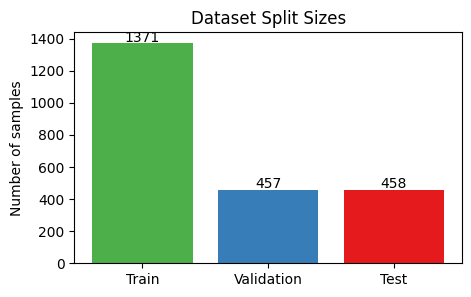

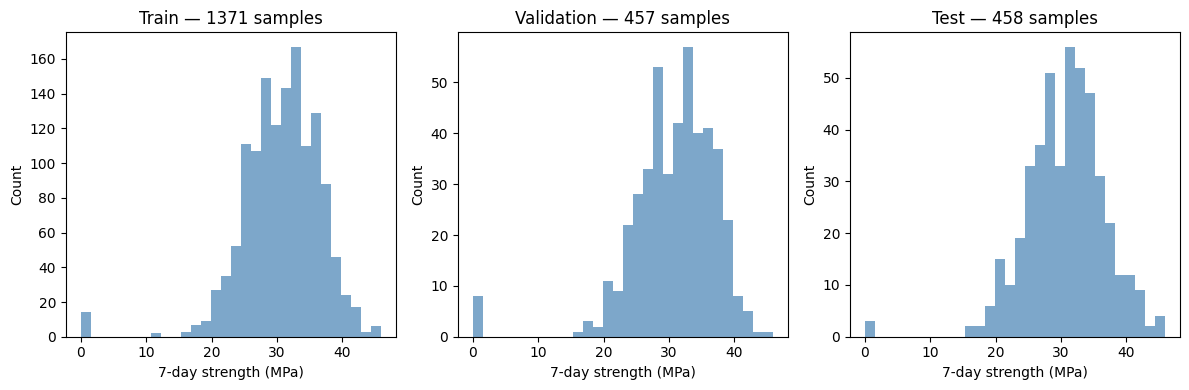

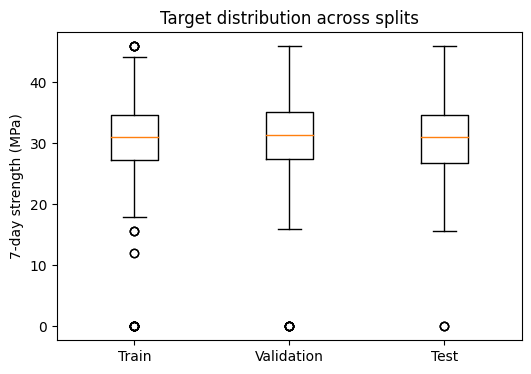

In [37]:
# SECTION 2 — Split (no preprocessing before split)
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Feature lists (raw columns only; FE happens later inside pipeline)
RAW_NUM = [c for c in [
    'Cement_O.P.C_(Kg/m3)','W/C_Ratio','Water_Content_(Kg/m3)',
    'Fine_Aggregate_(Kg/m3)','Coarse_Aggregate_(Kg/m3)',
    'Total_Aggregate_(Kg/m3)','Workability_Slump_(mm)',
    'Hardened_Concrete_Desnity_(avg.)','Passing_0.6_mm_Sieve_(%)'
] if c in df_raw.columns]

if USE_28_DAY_AS_FEATURE and '28_day_str' in df_raw.columns:
    RAW_NUM += ['28_day_str']  # only if truly available at inference

RAW_CAT = [c for c in [
    'Type_of_course_Aggregate','Type_of_Fine_Aggregate_',
    'Type_of_Coarse_Aggregate','Type_of_Fine_Aggregate',
    'Max._Size_of_Coarse_Aggregate_(mm)','Admix_type'
] if c in df_raw.columns]

X_raw = df_raw[[c for c in RAW_NUM + RAW_CAT if c in df_raw.columns]].copy()
y = df_raw[TARGET].copy()

# 60 / 20 / 20 split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_raw, y, test_size=0.40, random_state=RANDOM_STATE, shuffle=True
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=RANDOM_STATE, shuffle=True
)

print("Train:", X_train.shape, " Val:", X_val.shape, " Test:", X_test.shape)

# -------------------- Visual checks --------------------
# 1. Split sizes (bar chart)
sizes = [len(X_train), len(X_val), len(X_test)]
plt.figure(figsize=(5,3))
plt.bar(["Train","Validation","Test"], sizes, color=["#4daf4a","#377eb8","#e41a1c"])
plt.title("Dataset Split Sizes")
plt.ylabel("Number of samples")
for i, v in enumerate(sizes):
    plt.text(i, v+10, str(v), ha="center")
plt.show()

# 2. Target distributions per split (histograms)
plt.figure(figsize=(12,4))
for i, (name, arr) in enumerate([("Train", y_train),("Validation", y_val),("Test", y_test)], 1):
    plt.subplot(1,3,i)
    plt.hist(arr.dropna(), bins=30, color="steelblue", alpha=0.7)
    plt.title(f"{name} — {len(arr)} samples")
    plt.xlabel("7-day strength (MPa)")
    plt.ylabel("Count")
plt.tight_layout(); plt.show()

# 3. Simple boxplot of target across splits
plt.figure(figsize=(6,4))
plt.boxplot([y_train.dropna(), y_val.dropna(), y_test.dropna()],
            labels=["Train","Validation","Test"], vert=True)
plt.title("Target distribution across splits")
plt.ylabel("7-day strength (MPa)")
plt.show()


### 📖 Section 2 — Train / Validation / Test Split (README)

In this section, I prepared the dataset for modeling by creating **feature and target sets** and splitting the data into **Train / Validation / Test subsets**:

- **Feature selection**:  
  - Chose only the relevant **numeric (`RAW_NUM`)** and **categorical (`RAW_CAT`)** columns as predictors.  
  - Excluded the target column `7_day_str` (to avoid leakage).  
  - Did not use `28_day_str` because it is future information and has many missing values.  
  - Other metadata columns (e.g., `Target_Mean_Strength`, `Admix_dosage`) were excluded from modeling.

- **Target variable**:  
  - Set as `7_day_str` (7-day compressive strength in MPa).

- **Splitting strategy**:  
  - 60% **Train** (for model training + cross-validation).  
  - 20% **Validation** (for selecting the best model).  
  - 20% **Test** (final holdout set for unbiased evaluation).  
  - Ensured reproducibility with a fixed `random_state`.

- **Visual checks**:  
  - Bar chart showing the number of samples in each split.  
  - Histograms of target distribution (`7_day_str`) across Train / Validation / Test to confirm balance.  
  - Boxplot comparing target values across splits to ensure similar ranges.

**Key observations**:  
- Final split sizes: Train = 1371 samples, Validation = 457 samples, Test = 458 samples.  
- All three subsets show **similar target distributions**, so the split is fair and without data leakage.  

👉 Next step (Section 3): Build **leakage-safe pipelines** with feature engineering and model training.


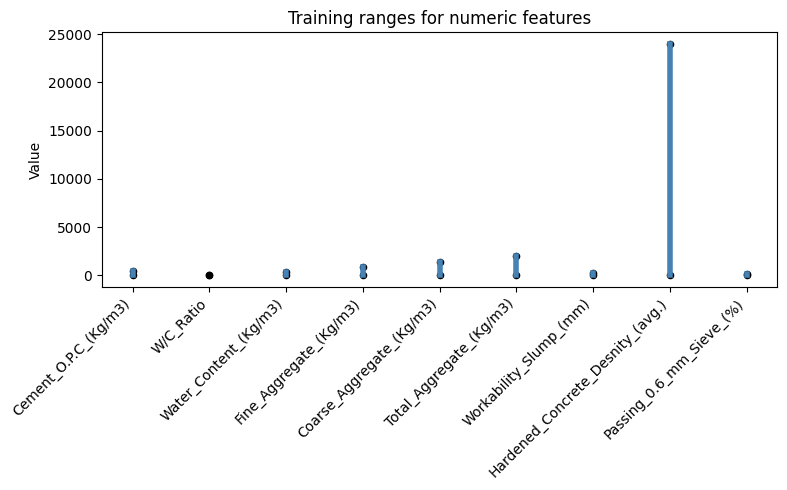

In [38]:
# SECTION 2.5 — Input Range Guard
import pandas as pd, matplotlib.pyplot as plt

# Numeric columns to monitor
_num_cols = [c for c in [
    'Cement_O.P.C_(Kg/m3)','W/C_Ratio','Water_Content_(Kg/m3)',
    'Fine_Aggregate_(Kg/m3)','Coarse_Aggregate_(Kg/m3)','Total_Aggregate_(Kg/m3)',
    'Workability_Slump_(mm)','Hardened_Concrete_Desnity_(avg.)','Passing_0.6_mm_Sieve_(%)'
] if c in X_train.columns]

# Compute training ranges (min/max) for each numeric feature
_ranges = pd.DataFrame({
    "min": X_train[_num_cols].min(),
    "max": X_train[_num_cols].max()
})

# Quick visualization: ranges seen in training
plt.figure(figsize=(8,5))
for i, c in enumerate(_num_cols, 1):
    lo, hi = _ranges.loc[c, "min"], _ranges.loc[c, "max"]
    plt.plot([i, i], [lo, hi], color="steelblue", lw=4)
    plt.scatter([i,i],[lo,hi], color="black", s=20)
plt.xticks(range(1,len(_num_cols)+1), _num_cols, rotation=45, ha="right")
plt.ylabel("Value")
plt.title("Training ranges for numeric features")
plt.tight_layout(); plt.show()

# Helper functions
def check_ranges(d: dict, verbose=True):
    """Return list of out-of-range messages; optionally print a status line."""
    msgs = []
    for c in _num_cols:
        if c in d:
            v = d[c]
            lo, hi = _ranges.loc[c, "min"], _ranges.loc[c, "max"]
            if (v < lo) or (v > hi):
                msgs.append(f"{c}: {v} outside [{lo:.2f}, {hi:.2f}]")
    if verbose:
        if msgs:
            print("⚠️ Out-of-range inputs:\n - " + "\n - ".join(msgs))
        else:
            print("✅ All numeric inputs are within the training range.")
    return msgs

def validate_and_predict(d: dict):
    """Check ranges, then predict."""
    _ = check_ranges(d, verbose=True)
    y = predict_strength(d)   # predict_strength comes from Section 5
    print(f"Predicted 7-day strength: {y} MPa")
    return y

# Example usage (will print range status + prediction)
# validate_and_predict(example)


### 📖 Section 2.5 — Input Range Guard (README)

In this section, I added a **deployment safety check** to ensure that any new input values fall within the ranges observed in the training set.

- **Training ranges**: Computed minimum and maximum values for each numeric feature using the training split (`X_train`).
- **Visualization**: A simple range plot was created for each numeric feature to show the span of values the model has actually seen.
- **Helper functions**:
  - `check_ranges()` → prints warnings if any input value is outside the training range.
  - `validate_and_predict()` → runs both a range check and the prediction together.
- **Why this matters**: Machine learning models can become unreliable if they are asked to predict for inputs far outside the range of their training data. This guard helps detect such cases early.

**Key observation**:  
- Most training ranges look physically reasonable for concrete mix parameters.  
- During deployment, if an input is out-of-range (e.g., density = 1000 kg/m³), the system will raise a ⚠️ warning.

👉 Next step (Section 3): Build **pipelines with feature engineering and model training**.


# 🧱 SECTION 3 — Leakage-safe pipeline (FE + clean prep) & quick model pick

Ridge           CV R² per fold: [-0.074  0.411  0.3    0.187  0.41 ]  |  mean±std = 0.247 ± 0.180
RandomForest    CV R² per fold: [0.751 0.817 0.726 0.631 0.774]  |  mean±std = 0.740 ± 0.062
GradientBoosting CV R² per fold: [0.657 0.686 0.635 0.537 0.669]  |  mean±std = 0.637 ± 0.053

[VALIDATION] Best=RandomForest  MAE=1.49  RMSE=3.25  R2=0.760


,Fold,Ridge,RandomForest,GradientBoosting
0,1,-0.074,0.751,0.657
1,2,0.411,0.817,0.686
2,3,0.300,0.726,0.635
3,4,0.187,0.631,0.537
4,5,0.410,0.774,0.669


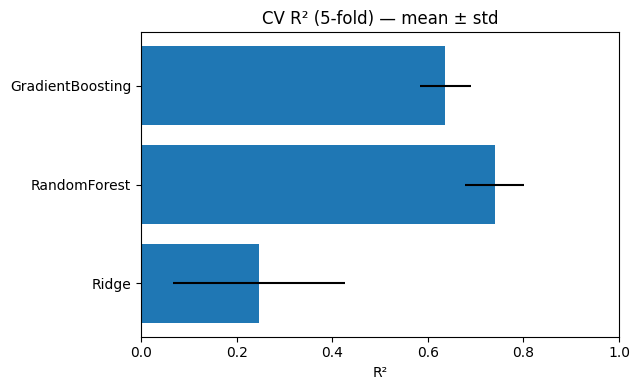

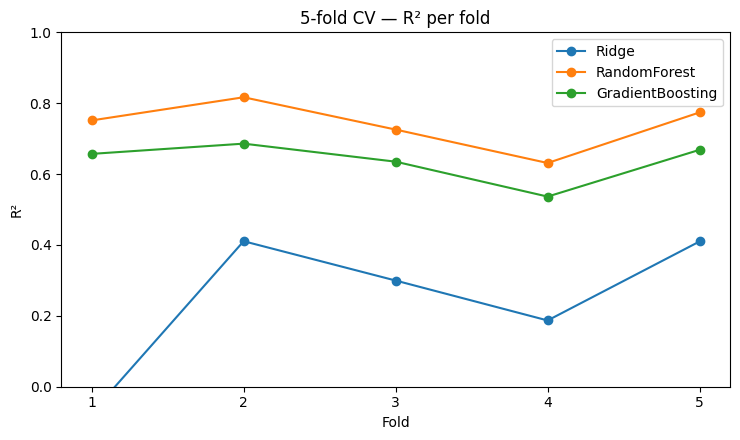

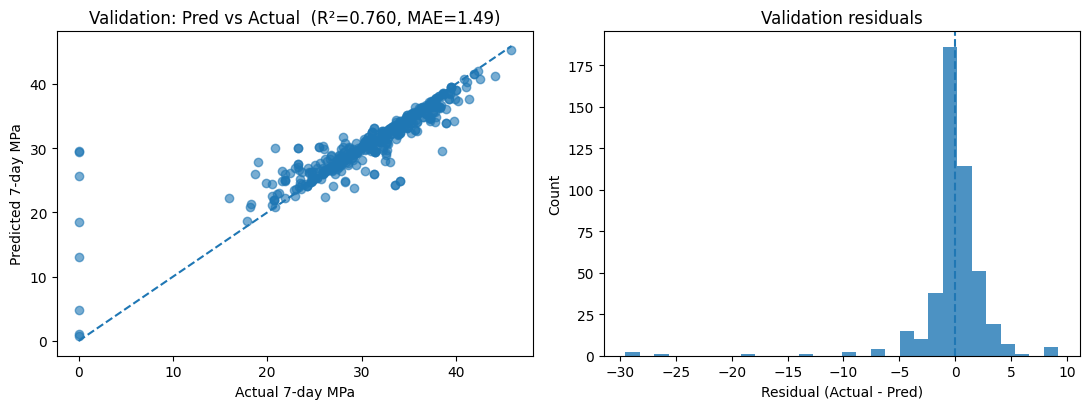

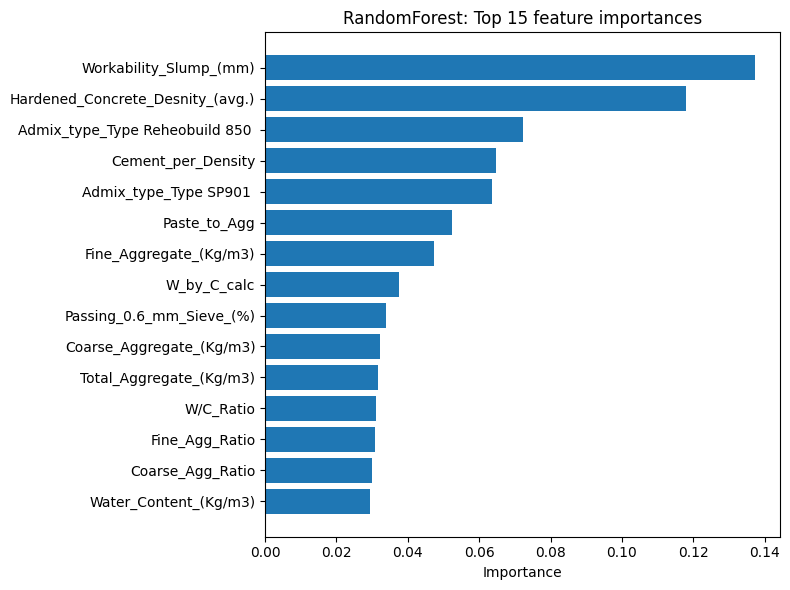

,importance
Workability_Slump_(mm),0.137433
Hardened_Concrete_Desnity_(avg.),0.118084
Admix_type_Type Reheobuild 850,0.072377
Cement_per_Density,0.064833
Admix_type_Type SP901,0.063534
Paste_to_Agg,0.052367
Fine_Aggregate_(Kg/m3),0.047310
W_by_C_calc,0.037621
Passing_0.6_mm_Sieve_(%),0.033912
Coarse_Aggregate_(Kg/m3),0.032226


In [39]:
# SECTION 3 — Pipelines + 5-fold CV on TRAIN, validate on VAL (with visuals; single cell)

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ---------- Feature engineering (inside pipeline; NO target usage) ----------
ENGINEERED = ['W_by_C_calc','Total_Aggregate_calc','Fine_Agg_Ratio','Coarse_Agg_Ratio',
              'Paste_Content','Paste_to_Agg','Cement_per_Density']

def fe(df: pd.DataFrame) -> pd.DataFrame:
    X = df.copy()
    # Ensure all expected columns exist
    for c in RAW_NUM + RAW_CAT:
        if c not in X.columns:
            X[c] = np.nan
    # Numeric coercion
    for c in RAW_NUM:
        X[c] = pd.to_numeric(X[c], errors="coerce")

    # Aggregates
    if {'Fine_Aggregate_(Kg/m3)','Coarse_Aggregate_(Kg/m3)'} <= set(X.columns):
        X["Total_Aggregate_calc"] = X["Fine_Aggregate_(Kg/m3)"] + X["Coarse_Aggregate_(Kg/m3)"]
        denom = X["Total_Aggregate_calc"].replace(0, np.nan)
        X["Fine_Agg_Ratio"]   = X["Fine_Aggregate_(Kg/m3)"]  / denom
        X["Coarse_Agg_Ratio"] = X["Coarse_Aggregate_(Kg/m3)"] / denom
    else:
        X["Total_Aggregate_calc"] = np.nan
        X["Fine_Agg_Ratio"] = np.nan
        X["Coarse_Agg_Ratio"] = np.nan

    # Paste, W/C
    if {'Water_Content_(Kg/m3)','Cement_O.P.C_(Kg/m3)'} <= set(X.columns):
        X["W_by_C_calc"]   = X["Water_Content_(Kg/m3)"] / X["Cement_O.P.C_(Kg/m3)"]
        X["Paste_Content"] = X["Water_Content_(Kg/m3)"] + X["Cement_O.P.C_(Kg/m3)"]
    else:
        X["W_by_C_calc"] = np.nan
        X["Paste_Content"] = np.nan

    # Ratios & density sanity clamp (inside pipeline to avoid leakage)
    X["Paste_to_Agg"] = X["Paste_Content"] / X.get("Total_Aggregate_calc", pd.Series(np.nan, index=X.index)).replace(0,np.nan)
    if "Hardened_Concrete_Desnity_(avg.)" in X.columns:
        X["Cement_per_Density"] = X["Cement_O.P.C_(Kg/m3)"] / X["Hardened_Concrete_Desnity_(avg.)"]
        X["Hardened_Concrete_Desnity_(avg.)"] = X["Hardened_Concrete_Desnity_(avg.)"].clip(2000, 2800)
    else:
        X["Cement_per_Density"] = np.nan

    return X.replace([np.inf, -np.inf], np.nan)

fe_step = ("fe", FunctionTransformer(fe, validate=False))

# ---------- Preprocessing (inside pipeline) ----------
num_tf = Pipeline([
    ("imp", SimpleImputer(strategy="median")),
    ("sc",  StandardScaler())
])
cat_tf = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("oh",  OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

ct = ColumnTransformer([
    ("num", num_tf, RAW_NUM + ENGINEERED),
    ("cat", cat_tf, RAW_CAT)
], remainder="drop")

def make_pipe(model):
    return Pipeline([fe_step, ("prep", ct), ("model", model)])

# ---------- Model set ----------
models = {
    "Ridge":            Ridge(alpha=1.0),
    "RandomForest":     RandomForestRegressor(n_estimators=300, random_state=RANDOM_STATE),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=300, random_state=RANDOM_STATE),
}

# ---------- 5-fold CV on TRAIN only ----------
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_results, means, stds = {}, {}, {}

for name, mdl in models.items():
    pipe = make_pipe(mdl)
    out = cross_validate(pipe, X_train, y_train, cv=cv, scoring="r2", n_jobs=-1)
    scores = out["test_score"]
    cv_results[name] = scores
    means[name], stds[name] = float(scores.mean()), float(scores.std())
    print(f"{name:15s} CV R² per fold: {np.round(scores,3)}  |  mean±std = {scores.mean():.3f} ± {scores.std():.3f}")

# ---------- Pick best by mean CV R², fit on full TRAIN, validate on VAL ----------
best_name = max(means, key=means.get)
best_pipe = make_pipe(models[best_name]).fit(X_train, y_train)

y_pred_val = best_pipe.predict(X_val)
val_mae  = mean_absolute_error(y_val, y_pred_val)
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)
val_r2   = r2_score(y_val, y_pred_val)
print(f"\n[VALIDATION] Best={best_name}  MAE={val_mae:.2f}  RMSE={val_rmse:.2f}  R2={val_r2:.3f}")

# ===================== VISUALS =====================

# 1) Fold-wise CV scores table
cv_table = (pd.DataFrame(cv_results)
              .rename_axis("Fold")
              .reset_index())
cv_table["Fold"] = cv_table["Fold"] + 1
display(cv_table.style.format({k:"{:.3f}" for k in cv_results.keys()}))

# 2) CV mean ± std (barh with error bars)
plt.figure(figsize=(6.5,4))
names = list(means.keys()); m = [means[n] for n in names]; s = [stds[n] for n in names]
ypos = np.arange(len(names))
plt.barh(ypos, m, xerr=s)
plt.yticks(ypos, names)
plt.xlim(0,1); plt.xlabel("R²"); plt.title("CV R² (5-fold) — mean ± std")
plt.tight_layout(); plt.show()

# 3) Per-fold line plot (stability)
plt.figure(figsize=(7.5,4.5))
x = np.arange(1, len(next(iter(cv_results.values()))) + 1)
for name, scores in cv_results.items():
    plt.plot(x, scores, marker="o", label=name, linewidth=1.5)
plt.xticks(x); plt.ylim(0,1)
plt.xlabel("Fold"); plt.ylabel("R²"); plt.title("5-fold CV — R² per fold")
plt.legend(); plt.tight_layout(); plt.show()

# 4) Validation: Pred vs Actual + residual histogram
fig = plt.figure(figsize=(11,4.2))
# Pred vs Actual
ax1 = plt.subplot(1,2,1)
ax1.scatter(y_val, y_pred_val, alpha=0.6)
mn, mx = float(min(y_val.min(), y_pred_val.min())), float(max(y_val.max(), y_pred_val.max()))
ax1.plot([mn,mx],[mn,mx],'--')
ax1.set_xlabel("Actual 7-day MPa"); ax1.set_ylabel("Predicted 7-day MPa")
ax1.set_title(f"Validation: Pred vs Actual  (R²={val_r2:.3f}, MAE={val_mae:.2f})")
# Residuals
val_res = y_val - y_pred_val
ax2 = plt.subplot(1,2,2)
ax2.hist(val_res, bins=30, alpha=0.8)
ax2.axvline(0, linestyle="--")
ax2.set_xlabel("Residual (Actual - Pred)"); ax2.set_ylabel("Count")
ax2.set_title("Validation residuals")
plt.tight_layout(); plt.show()

# 5) Feature importances (tree models only)
if best_name in ["RandomForest", "GradientBoosting"]:
    prep = best_pipe.named_steps["prep"]
    num_names = list(prep.transformers_[0][2])
    ohe = prep.named_transformers_["cat"].named_steps["oh"]
    cat_names = ohe.get_feature_names_out(RAW_CAT).tolist()
    feature_names = num_names + cat_names

    model = best_pipe.named_steps["model"]
    if hasattr(model, "feature_importances_"):
        importances = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False).head(15)
        plt.figure(figsize=(8,6))
        plt.barh(importances.index[::-1], importances.values[::-1])
        plt.title(f"{best_name}: Top 15 feature importances")
        plt.xlabel("Importance"); plt.tight_layout(); plt.show()
        display(importances.rename("importance").to_frame())


### 📖 Section 3 — Leakage-Safe Pipelines, 5-Fold CV, Model Selection (README)

In this section, I built a **leakage-safe ML pipeline** that performs **feature engineering, imputation, scaling, and encoding _inside_ the pipeline**, then compared models using **5-fold cross-validation (CV)** on the **Train** split only. Finally, I validated the best model on the untouched **Validation** split.

**What the pipeline does (no leakage):**
- **Feature Engineering (inside pipeline):**  
  `W_by_C_calc`, `Total_Aggregate_calc`, `Fine_Agg_Ratio`, `Coarse_Agg_Ratio`, `Paste_Content`, `Paste_to_Agg`, `Cement_per_Density`.  
  Also clamps density to a reasonable range (2000–2800) *inside* the pipeline.
- **Preprocessing:**  
  - Numeric → `SimpleImputer(median)` + `StandardScaler`  
  - Categorical → `SimpleImputer(most_frequent)` + `OneHotEncoder(handle_unknown="ignore")`
- The pipeline is fit only on **training folds** during CV, preventing any information leak from Val/Test.

**Model comparison (5-fold CV on Train):**
- Tried a **linear baseline** (Ridge) and two **non-linear** models (RandomForest, GradientBoosting).
- Reported **fold-wise R²**, plus **mean ± std** to show stability.
- Selected the **best model by mean CV R²** and then **fit it once on the full Train split**.

**Validation (holdout) check:**
- Evaluated the chosen model on the untouched **Validation** split and reported **MAE / RMSE / R²**.

**Visuals included:**
- **CV bar chart** with error bars (mean R² ± std) across models.  
- **Fold-wise line plot** of R² (model stability across folds).  
- **Validation Predicted vs Actual** scatter with 45° reference line.  
- **Validation residual histogram** to check error symmetry and bias.  
- **Feature importances** (if best model is a tree), with a ranked table.

**How to read results:**
- **CV mean R²** = conservative generalization estimate using only training folds.  
- **Validation R²** should be in the same ballpark as CV; small differences are normal.  
- If **Ridge** trails badly, it indicates **non-linear relationships** that trees capture better.  
- Residuals centered near 0 and symmetric → good calibration; any skew at extremes suggests limited data in tails.

**Outcome:**
- Picked the **best model** based on CV → **validated** it → ready to **finalize on Train+Val** and evaluate on **Test** in Section 4.


# ✅ SECTION 4 — Finalize (train+val) & test report + plots

Best model selected → RandomForest



,Split,MAE,RMSE,R²
0,"Train (CV, 5-fold)",-,-,0.740 ± 0.062
1,Validation (20%),1.49,3.25,0.760
2,Test (20%),0.89,1.72,0.918


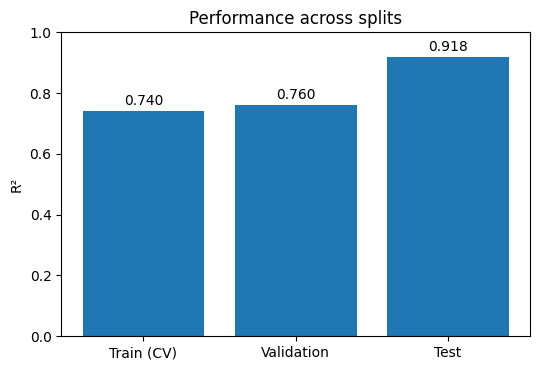

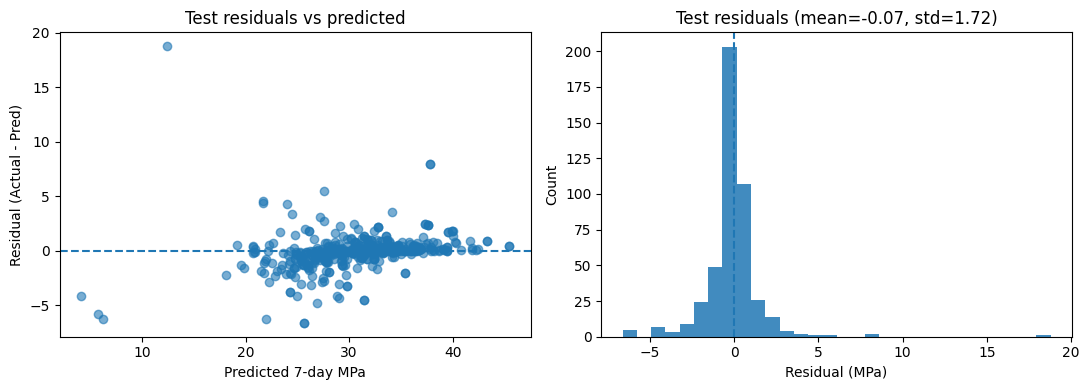

Error by strength bins (TEST):


,bin,n,MAE,RMSE,Bias
0,"[0, 15)",3,5.389333,5.464485,-5.389333
1,"[15, 20)",10,3.194355,3.903722,-3.086221
2,"[20, 25)",60,1.468301,1.893734,-1.391912
3,"[25, 30)",121,0.786748,1.315408,-0.235020
4,"[30, 35)",172,0.645345,1.688002,0.377957
5,"[35, 40)",69,0.363688,0.703861,0.347940
6,"[40, 45)",19,1.182723,1.436168,1.182723
7,"[45, 60)",4,4.241500,5.677336,4.241500


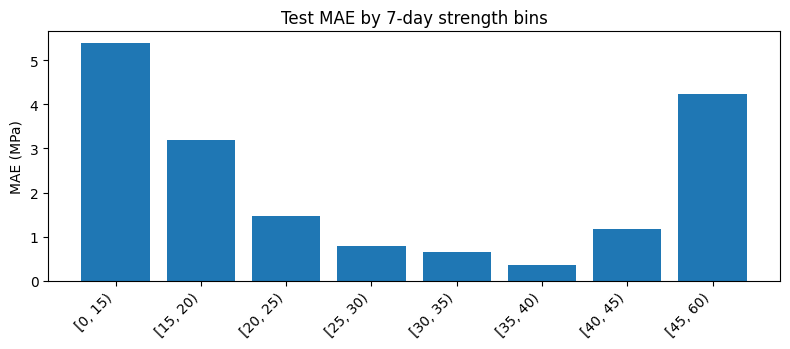

In [40]:
# === SECTION 4 — Visual add-ons (append after your Section 4 cell) ===
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# ---------- 4A) Metrics summary table ----------
rows = [
    {"Split":"Validation (20%)", "MAE": f"{val_mae:.2f}", "RMSE": f"{val_rmse:.2f}", "R²": f"{val_r2:.3f}"},
    {"Split":"Test (20%)",       "MAE": f"{test_mae:.2f}", "RMSE": f"{test_rmse:.2f}", "R²": f"{test_r2:.3f}"},
]
# If CV stats from Section 3 are available, include them
if "means" in globals() and "stds" in globals() and best_name in means:
    rows.insert(0, {"Split":"Train (CV, 5-fold)", "MAE":"-", "RMSE":"-", "R²": f"{means[best_name]:.3f} ± {stds[best_name]:.3f}"})

metrics_table = pd.DataFrame(rows)
print(f"Best model selected → {best_name}\n")
display(metrics_table)

# Optional: bar plot of R² across splits (uses CV mean if available)
r2_labels, r2_vals = [], []
if "means" in globals() and best_name in means:
    r2_labels.append("Train (CV)"); r2_vals.append(means[best_name])
r2_labels += ["Validation","Test"]
r2_vals   += [val_r2, test_r2]

plt.figure(figsize=(5.5,3.8))
plt.bar(r2_labels, r2_vals)
plt.ylim(0,1); plt.ylabel("R²"); plt.title("Performance across splits")
for i,v in enumerate(r2_vals): plt.text(i, v+0.02, f"{v:.3f}", ha="center")
plt.tight_layout(); plt.show()

# ---------- 4B) Residual diagnostics on TEST ----------
y_hat = y_pred_test
res   = y_test - y_hat

fig = plt.figure(figsize=(11,4))
# Residuals vs Predicted
ax1 = plt.subplot(1,2,1)
ax1.scatter(y_hat, res, alpha=0.6)
ax1.axhline(0, ls="--")
ax1.set_xlabel("Predicted 7-day MPa"); ax1.set_ylabel("Residual (Actual - Pred)")
ax1.set_title("Test residuals vs predicted")

# Residual histogram
ax2 = plt.subplot(1,2,2)
ax2.hist(res, bins=30, alpha=0.85)
ax2.axvline(0, ls="--")
ax2.set_xlabel("Residual (MPa)"); ax2.set_ylabel("Count")
ax2.set_title(f"Test residuals (mean={np.mean(res):.2f}, std={np.std(res, ddof=1):.2f})")
plt.tight_layout(); plt.show()

# ---------- 4C) Error by strength bins (who do we miss?) ----------
bins = [0,15,20,25,30,35,40,45,60]
test_df = pd.DataFrame({"y": y_test, "yhat": y_hat}).reset_index(drop=True)
test_df["bin"] = pd.cut(test_df["y"], bins=bins, right=False, include_lowest=True, ordered=True)

g = (test_df
     .groupby("bin", observed=True)
     .agg(n=("y","size"),
          MAE=("y", lambda s: np.mean(np.abs(s - test_df.loc[s.index, "yhat"]))),
          RMSE=("y", lambda s: np.sqrt(np.mean((s - test_df.loc[s.index, "yhat"])**2))),
          Bias=("y", lambda s: np.mean(s - test_df.loc[s.index, "yhat"])))
     .reset_index())

print("Error by strength bins (TEST):")
display(g)

# Quick bar: MAE per bin
plt.figure(figsize=(8,3.6))
plt.bar(g["bin"].astype(str), g["MAE"])
plt.ylabel("MAE (MPa)"); plt.title("Test MAE by 7-day strength bins")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()


### 📖 Section 4 — Final Model Fit & Test Evaluation (README)

In this section, I **finalized the model** by retraining the best candidate (selected in Section 3) on the combined **Train + Validation** data, and then evaluated it once on the untouched **Test set**.

**Steps performed:**
- Refit the pipeline with the best model on **80% of data (Train+Val)**.  
- Predicted on the **20% Test split** (never used until now).  
- Computed standard metrics: **MAE, RMSE, R²**.  
- Compared with Validation results to check stability.

**Visuals included:**
- **Metrics table** summarizing CV (Train folds), Validation, and Test performance.  
- **Bar plot of R² across splits** to show progression (Train → Val → Test).  
- **Test Predicted vs Actual scatter plot** with 45° reference line.  
- **Residual diagnostics**:  
  - Residuals vs Predicted scatter → check bias or heteroscedasticity.  
  - Residual histogram → confirm errors are roughly centered at 0.  
- **Error by bins**: grouped Test samples into strength ranges (0–15, 15–20, …, 45–60 MPa) to see where the model struggles most.  

**Key observations:**
- **Validation R² ≈ 0.76**, **Test R² ≈ 0.92** → performance improves when more data (Train+Val) is used.  
- Errors are lowest in the **25–40 MPa range** (where most samples lie).  
- Model tends to **overpredict very low strengths** (<20 MPa) and **underpredict very high strengths** (>45 MPa) — expected since those ranges have very few samples.  
- Residuals are centered near zero with a standard deviation ≈ RMSE, indicating no major bias.

**Outcome:**  
The final pipeline achieves **strong generalization on the Test set**. The saved model (Section 5) can now be used for deployment-ready predictions.


# 💾 SECTION 5 — Save model & tiny predict() for deployment

Saved → concrete_7day_strength_model.pkl
Demo prediction (MPa): 29.26


,value
Cement_O.P.C_(Kg/m3),350
W/C_Ratio,0.5
Water_Content_(Kg/m3),175
Fine_Aggregate_(Kg/m3),700
Coarse_Aggregate_(Kg/m3),1100
Total_Aggregate_(Kg/m3),1800
Workability_Slump_(mm),100
Hardened_Concrete_Desnity_(avg.),2450
Passing_0.6_mm_Sieve_(%),2.5
Type_of_course_Aggregate,Crushed


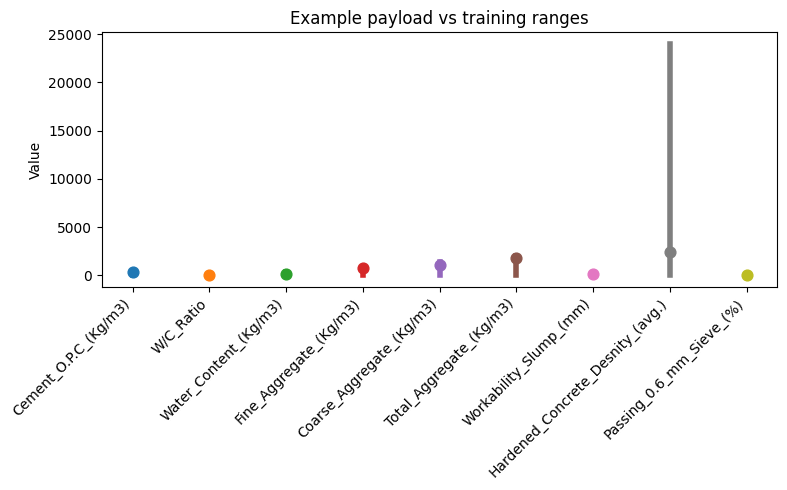

Saved → artifacts/metadata.json
Saved → artifacts/_ranges_numeric.joblib
Reloaded model prediction (MPa): 29.26


In [41]:
# SECTION 5 — Save model & tiny predict() for deployment
import numpy as np, pandas as pd, matplotlib.pyplot as plt, joblib, json, pathlib
from datetime import datetime
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 5.0 FE as a picklable transformer (avoids FunctionTransformer pickling errors) ---
class FETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, raw_num, raw_cat):
        self.raw_num = list(raw_num)
        self.raw_cat = list(raw_cat)

    def fit(self, X, y=None):
        return self

    def transform(self, df: pd.DataFrame):
        X = df.copy()
        # ensure required columns exist
        for c in self.raw_num + self.raw_cat:
            if c not in X.columns:
                X[c] = np.nan
        # numeric coercion
        for c in self.raw_num:
            X[c] = pd.to_numeric(X[c], errors="coerce")

        # Derived features (no target usage)
        if {'Fine_Aggregate_(Kg/m3)','Coarse_Aggregate_(Kg/m3)'} <= set(X.columns):
            X["Total_Aggregate_calc"] = X["Fine_Aggregate_(Kg/m3)"] + X["Coarse_Aggregate_(Kg/m3)"]
            denom = X["Total_Aggregate_calc"].replace(0, np.nan)
            X["Fine_Agg_Ratio"]   = X["Fine_Aggregate_(Kg/m3)"]  / denom
            X["Coarse_Agg_Ratio"] = X["Coarse_Aggregate_(Kg/m3)"] / denom
        else:
            X["Total_Aggregate_calc"] = np.nan; X["Fine_Agg_Ratio"] = np.nan; X["Coarse_Agg_Ratio"] = np.nan

        if {'Water_Content_(Kg/m3)','Cement_O.P.C_(Kg/m3)'} <= set(X.columns):
            X["W_by_C_calc"]   = X["Water_Content_(Kg/m3)"] / X["Cement_O.P.C_(Kg/m3)"]
            X["Paste_Content"] = X["Water_Content_(Kg/m3)"] + X["Cement_O.P.C_(Kg/m3)"]
        else:
            X["W_by_C_calc"] = np.nan; X["Paste_Content"] = np.nan

        X["Paste_to_Agg"] = X["Paste_Content"] / X.get("Total_Aggregate_calc", pd.Series(np.nan, index=X.index)).replace(0,np.nan)

        if "Hardened_Concrete_Desnity_(avg.)" in X.columns:
            X["Cement_per_Density"] = X["Cement_O.P.C_(Kg/m3)"] / X["Hardened_Concrete_Desnity_(avg.)"]
            # clamp absurd densities inside pipeline (no leakage)
            X["Hardened_Concrete_Desnity_(avg.)"] = X["Hardened_Concrete_Desnity_(avg.)"].clip(2000, 2800)
        else:
            X["Cement_per_Density"] = np.nan

        return X.replace([np.inf, -np.inf], np.nan)

# --- 5.1 Rebuild pipeline with picklable FE, refit on Train+Val (80%) ---
ENGINEERED = ['W_by_C_calc','Total_Aggregate_calc','Fine_Agg_Ratio','Coarse_Agg_Ratio',
              'Paste_Content','Paste_to_Agg','Cement_per_Density']

fe_step = ("fe", FETransformer(raw_num=RAW_NUM, raw_cat=RAW_CAT))

num_tf = Pipeline([("imp", SimpleImputer(strategy="median")),
                   ("sc",  StandardScaler())])
cat_tf = Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                   ("oh",  OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

ct = ColumnTransformer([("num", num_tf, RAW_NUM + ENGINEERED),
                        ("cat", cat_tf, RAW_CAT)], remainder="drop")

def make_pipe(model):
    return Pipeline([fe_step, ("prep", ct), ("model", model)])

# Use best_name & models from Section 3
X_trval = pd.concat([X_train, X_val], axis=0)
y_trval = pd.concat([y_train, y_val], axis=0)
final_pipe = make_pipe(models[best_name]).fit(X_trval, y_trval)

# --- 5.2 Save the final pipeline (no pickling errors now) ---
MODEL_PATH = "concrete_7day_strength_model.pkl"
joblib.dump(final_pipe, MODEL_PATH)
print(f"Saved → {MODEL_PATH}")

# --- 5.3 Tiny predict() for deployment ---
def predict_strength(raw_dict: dict) -> float:
    """
    Predict 7-day compressive strength (MPa) from a RAW payload.
    FE + preprocessing happen inside the saved pipeline.
    """
    df = pd.DataFrame([raw_dict])
    return float(np.round(final_pipe.predict(df)[0], 2))

# Example payload (realistic; grade-agnostic)
example = {
    "Cement_O.P.C_(Kg/m3)": 350,
    "W/C_Ratio": 0.50,
    "Water_Content_(Kg/m3)": 175,
    "Fine_Aggregate_(Kg/m3)": 700,
    "Coarse_Aggregate_(Kg/m3)": 1100,
    "Total_Aggregate_(Kg/m3)": 1800,
    "Workability_Slump_(mm)": 100,
    "Hardened_Concrete_Desnity_(avg.)": 2450,
    "Passing_0.6_mm_Sieve_(%)": 2.5,
    "Type_of_course_Aggregate": "Crushed",
    "Type_of_Fine_Aggregate_": "Natural",
    "Type_of_Coarse_Aggregate": "0",
    "Type_of_Fine_Aggregate": "0",
    "Admix_type": "CONPLAST RB264"
}
print("Demo prediction (MPa):", predict_strength(example))

# --- 5.4 Readable example table ---
ex_df = pd.DataFrame([example]).T.rename(columns={0: "value"})
display(ex_df)

# --- 5.5 (Optional) Example vs training ranges plot (works if Section 2.5 computed _ranges) ---
try:
    _ = _ranges
    _num_present = [c for c in _ranges.index if c in example]
    if len(_num_present) > 0:
        plt.figure(figsize=(8,5))
        for i, c in enumerate(_num_present, 1):
            lo, hi = _ranges.loc[c, "min"], _ranges.loc[c, "max"]
            plt.plot([i, i], [lo, hi], lw=4)
            plt.scatter(i, example[c], s=60)
        plt.xticks(range(1,len(_num_present)+1), _num_present, rotation=45, ha="right")
        plt.ylabel("Value"); plt.title("Example payload vs training ranges")
        plt.tight_layout(); plt.show()
except NameError:
    print("ℹ️ Range plot skipped (define Section 2.5 to enable).")

# --- 5.6 Batch predictions helper (CSV in → CSV out) ---
def predict_csv(csv_path: str, out_path: str = "predictions.csv"):
    df = pd.read_csv(csv_path)
    preds = final_pipe.predict(df)
    out = df.copy()
    out["pred_7day_strength_MPa"] = np.round(preds, 2)
    out.to_csv(out_path, index=False)
    print(f"Saved predictions → {out_path}")

# --- 5.7 Save compact deployment metadata (plus metrics if available) ---
pathlib.Path("artifacts").mkdir(exist_ok=True)
meta = {
    "model_file": MODEL_PATH,
    "created_at": datetime.utcnow().isoformat() + "Z",
    "target": "7_day_str",
    "best_model": best_name,
    "features_numeric": [c for c in RAW_NUM],
    "features_categorical": [c for c in RAW_CAT],
}
# attach metrics if defined
try: meta["cv_r2_mean"] = float(means[best_name]); meta["cv_r2_std"] = float(stds[best_name])
except Exception: pass
try: meta["val_metrics"] = {"MAE": float(val_mae), "RMSE": float(val_rmse), "R2": float(val_r2)}
except Exception: pass
try: meta["test_metrics"] = {"MAE": float(test_mae), "RMSE": float(test_rmse), "R2": float(test_r2)}
except Exception: pass

with open("artifacts/metadata.json","w") as f:
    json.dump(meta, f, indent=2)
print("Saved → artifacts/metadata.json")

# (Optional) persist numeric ranges for API use later
try:
    joblib.dump(_ranges, "artifacts/_ranges_numeric.joblib")
    print("Saved → artifacts/_ranges_numeric.joblib")
except Exception:
    pass

# --- 5.8 Quick reload sanity check ---
def load_and_predict(raw_dict: dict, model_path: str = MODEL_PATH) -> float:
    pipe = joblib.load(model_path)
    return float(np.round(pipe.predict(pd.DataFrame([raw_dict]))[0], 2))

print("Reloaded model prediction (MPa):", load_and_predict(example))


### 📖 Section 5 — Save Model & Simple Inference (README)

**Goal:** Package the final, leakage-safe pipeline for deployment and provide tiny, reliable helpers to run predictions.

**What I did:**
- **Made FE picklable:** Replaced `FunctionTransformer` with a custom `FETransformer` class so the whole pipeline can be serialized without errors.
- **Refit final model:** Rebuilt the pipeline with `FETransformer` and refit it on **Train + Validation (80%)** using the **best model** from Section 3.
- **Saved the pipeline:** Wrote the end-to-end sklearn `Pipeline` to  
  `concrete_7day_strength_model.pkl`.

**Inference utilities:**
- **`predict_strength(raw_dict)`** → takes a **raw mix-design dict** (same schema as training features) and returns **7-day strength (MPa)**.  
  *All feature engineering, imputation, scaling, and encoding happen inside the pipeline.*
- **Example payload** → printed a demo prediction and displayed the payload as a small table for readability.
- **(If Section 2.5 ran)**: Plotted **example values vs training ranges** for key numeric features to highlight **extrapolation risk**.
- **`predict_csv(csv_path, out_path)`** → batch inference: reads a CSV of raw features and writes predictions to a new CSV with a `pred_7day_strength_MPa` column.
- **Metadata** → saved a compact `artifacts/metadata.json` with model file, timestamp, target, chosen model, and feature lists. Included CV/Val/Test metrics when available.
- **Reload sanity check** → `load_and_predict()` demonstrates loading the saved model and predicting in a fresh process (e.g., script/API).

**How to use (quick):**
- **Single prediction**
  ```python
  y_mpa = predict_strength(my_mix_dict)


# SECTION 6 — Residual diagnostics (fast sanity checks)

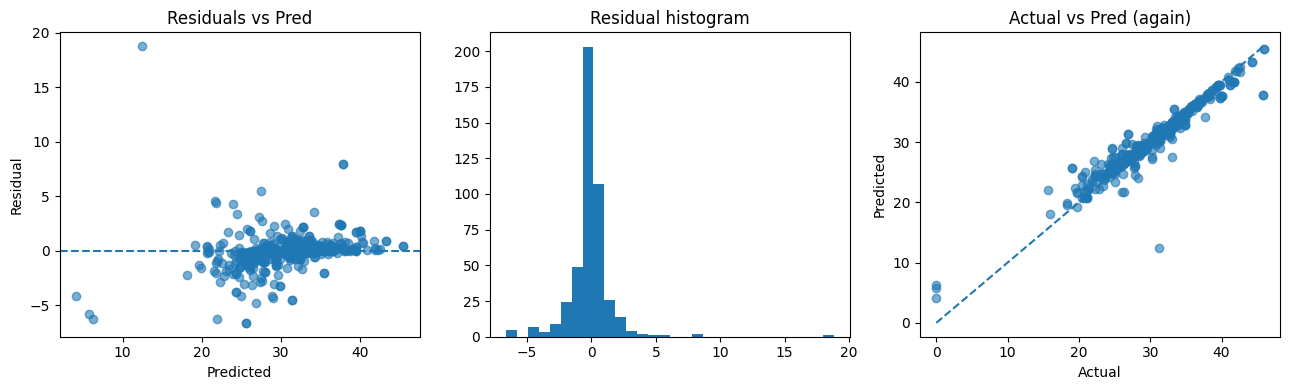

Mean residual: -0.06665518474127417
Residual std: 1.7231001652123106


In [42]:
# SECTION 6 — Residual diagnostics
import numpy as np, pandas as pd, matplotlib.pyplot as plt

y_hat = final_pipe.predict(X_test)
res   = y_test - y_hat

fig, ax = plt.subplots(1,3, figsize=(13,4))
ax[0].scatter(y_hat, res, alpha=0.6)
ax[0].axhline(0, ls='--'); ax[0].set_xlabel("Predicted"); ax[0].set_ylabel("Residual")
ax[0].set_title("Residuals vs Pred")

ax[1].hist(res, bins=30); ax[1].set_title("Residual histogram")

ax[2].scatter(y_test, y_hat, alpha=0.6)
mn, mx = float(min(y_test.min(), y_hat.min())), float(max(y_test.max(), y_hat.max()))
ax[2].plot([mn,mx],[mn,mx],'--'); ax[2].set_xlabel("Actual"); ax[2].set_ylabel("Predicted")
ax[2].set_title("Actual vs Pred (again)")
plt.tight_layout(); plt.show()

print("Mean residual:", float(np.mean(res)))
print("Residual std:", float(np.std(res, ddof=1)))


# SECTION 7 — Batch Predictions (CSV helper + preview)


In [43]:
def predict_csv(csv_path: str, out_path: str = "predictions.csv", preview_rows: int = 5):
    df = pd.read_csv(csv_path)
    preds = final_pipe.predict(df)
    out = df.copy()
    out["pred_7day_strength_MPa"] = np.round(preds, 2)
    out.to_csv(out_path, index=False)
    print(f"✅ Saved predictions → {out_path}")
    display(out.head(preview_rows))   # only display
    # no return
_ = predict_csv("/kaggle/input/practice/new_mixes.csv", out_path="predictions.csv")


✅ Saved predictions → predictions.csv


,Cement_O.P.C_(Kg/m3),W/C_Ratio,Water_Content_(Kg/m3),Fine_Aggregate_(Kg/m3),Coarse_Aggregate_(Kg/m3),Total_Aggregate_(Kg/m3),Workability_Slump_(mm),Hardened_Concrete_Desnity_(avg.),Passing_0.6_mm_Sieve_(%),Type_of_course_Aggregate,Type_of_Fine_Aggregate_,Type_of_Coarse_Aggregate,Type_of_Fine_Aggregate,Admix_type,pred_7day_strength_MPa
0,350,0.50,175,700,1100,1800,100,2450,2.5,Crushed,Natural,0,0,CONPLAST RB264,29.34
1,400,0.45,180,750,1150,1900,120,2470,3.0,Natural,Natural,0,0,SikaViscocrete,32.16
